In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:

# Define paths
data_dir = "train"
test_dir = "test"


In [ ]:
# Set up data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,          
    rotation_range=10,            
    brightness_range=[0.8, 1.2], 
    zoom_range=0.1,             
    horizontal_flip=True,         
    validation_split=0.2          
)

test_datagen = ImageDataGenerator(rescale=1.0/255)


In [ ]:


# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',  
    subset='training'     
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='validation'   
)

# Testing data generator (no data augmentation applied here)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    shuffle=False          
)


Found 6640 images belonging to 3 classes.
Found 1659 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')  
])



c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [7]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)
]

In [ ]:
!pip install Pillow==9.1.0


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import sys
from PIL import Image
#import Image
sys.modules['Image'] = Image 

In [8]:
# Train the model with callbacks
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15


c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


208/208 ━━━━━━━━━━━━━━━━━━━━ 844s 4s/step - accuracy: 0.6634 - loss: 1.6308 - val_accuracy: 0.5600 - val_loss: 1.6202 - learning_rate: 1.0000e-04
Epoch 2/15
208/208 ━━━━━━━━━━━━━━━━━━━━ 775s 4s/step - accuracy: 0.8480 - loss: 1.0832 - val_accuracy: 0.7697 - val_loss: 1.2450 - learning_rate: 1.0000e-04
Epoch 3/15
208/208 ━━━━━━━━━━━━━━━━━━━━ 761s 4s/step - accuracy: 0.8844 - loss: 0.9857 - val_accuracy: 0.8632 - val_loss: 1.0139 - learning_rate: 1.0000e-04
Epoch 4/15
208/208 ━━━━━━━━━━━━━━━━━━━━ 765s 4s/step - accuracy: 0.9052 - loss: 0.9364 - val_accuracy: 0.8758 - val_loss: 0.9644 - learning_rate: 1.0000e-04
Epoch 5/15
208/208 ━━━━━━━━━━━━━━━━━━━━ 596s 3s/step - accuracy: 0.9201 - loss: 0.8757 - val_accuracy: 0.8915 - val_loss: 0.9641 - learning_rate: 1.0000e-04
Epoch 6/15
208/208 ━━━━━━━━━━━━━━━━━━━━ 522s 2s/step - accuracy: 0.9275 - loss: 0.8517 - val_accuracy: 0.8873 - val_loss: 0.8992 - learning_rate: 1.0000e-04
Epoch 7/15
208/208 ━━━━━━━━━━━━━━━━━━━━ 532s 3s/step - accuracy: 0.92

In [9]:
model.save('simple_cnn_model.keras')

In [81]:
import tensorflow as tf
from tensorflow.keras import layers

class CustomModel(tf.keras.Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))
        self.pool1 = layers.MaxPooling2D((2, 2))
        self.flatten = layers.Flatten()
        self.dense = layers.Dense(4, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.flatten(x)
        return self.dense(x)

# Create and compile the model
model = CustomModel()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Create a dummy input and call the model
dummy_input = tf.random.normal((1, 128, 128, 3))
output = model(dummy_input)

# Access the model's inputs and outputs through the call method
print("Output shape:", output.shape)  # Output shape: (1, 4)

Output shape: (1, 4)


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Classification Report:
               precision    recall  f1-score   support

citrus canker       1.00      0.73      0.84       100
      healthy       0.78      0.97      0.87       100
     melanose       0.96      0.99      0.98       100

     accuracy                           0.90       300
    macro avg       0.91      0.90      0.90       300
 weighted avg       0.91      0.90      0.90       300



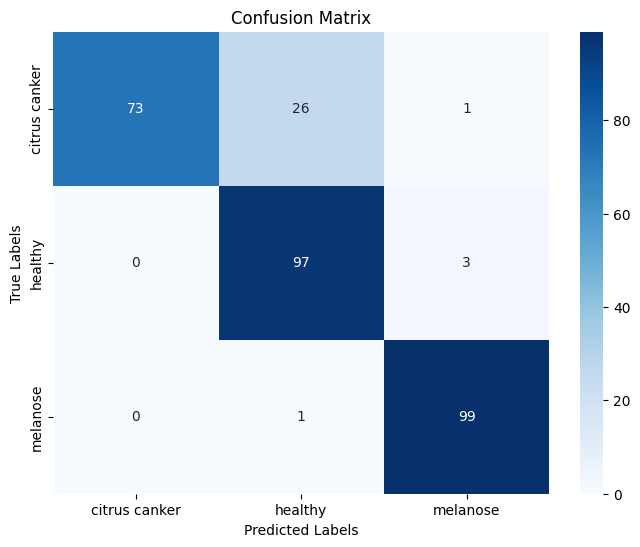

In [ ]:
# Assuming 'test_generator' is your test data generator
# and 'model' is your trained model

# Step 1: Get predictions and true labels
test_generator.reset()  # Reset the generator if it has been used before
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Step 2: Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Step 3: Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

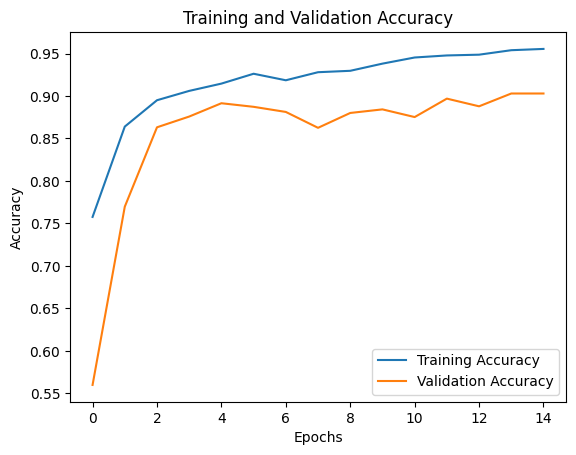

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('cnn_model.keras')
